## Sat Chirp Backgrounder
# By Terry Bondy, VA3TYB
# $$\today$$
## Scope
# What is described here is background for a means of determining the 
# instantaneous translating properties of a linear satellite by sending 
# a single brief 'chirp' in the uplink and listening across the satellite band 
# for the downlink with an SDR and doing some processing. These translation 
# properties include:
#
# * The instantaneous tranlation frequency,
# * Whether the downlink is USB or LSB.
#

## Producing This Document
# This document is produced using *Octave*, an open source tool very similar to
# *Matlab*. The lines in the boxes are *Octave* commands to create the 
# mathematical examples that are used.

## A Brief Review of Signal Analysis In The Time and Frequency Domains
# 
# Consider a 20 Hz wave modulated by a triangular pulse over one second 
# sampled at 48 kHz (Figure 1).

# Create a vector of times between 
# -0.5 and 0.5 at 1/48000 intervals


In [1]:
T = [ -0.5 : 1/48000 : 0.5]; 

# Create a vector of voltages for those times

In [2]:
V_of_t = 2 * cos(2*pi*20*T) .* (0.5 - abs(T));

# ...and then plot the voltage in the time domain

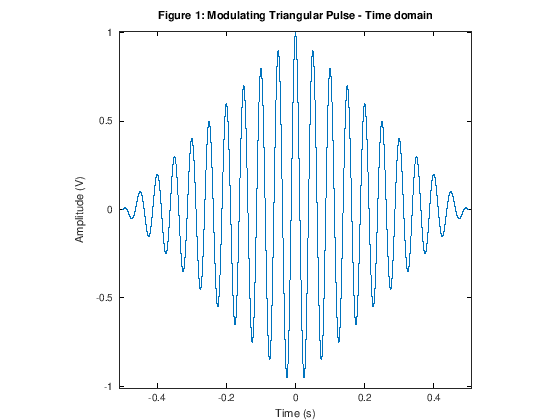

In [3]:
plot(T, V_of_t)
ylabel("Amplitude (V)")
xlabel("Time (s)")
title("Figure 1: Modulating Triangular Pulse - Time domain")
axis('square')
axis([-0.51 0.51 -1.01 1.01])

##
# Now do an FFT to determine the frequency components of the signal (Figure 2).

# Use |fft| to do an analysis of the time signal in the 
# frequency domain. Use |fftshift| to shift 0 Hz to the 
# centre of the vector

In [4]:
V_of_f = fftshift(fft(V_of_t, (size(V_of_t,2)-1)*10+1)/(size(V_of_t,2)/2));

# Create a vector of frequencies for plotting

In [5]:
F = [-24000: 1/10: 24000];

# ...and then plot the voltage in the frequency domain

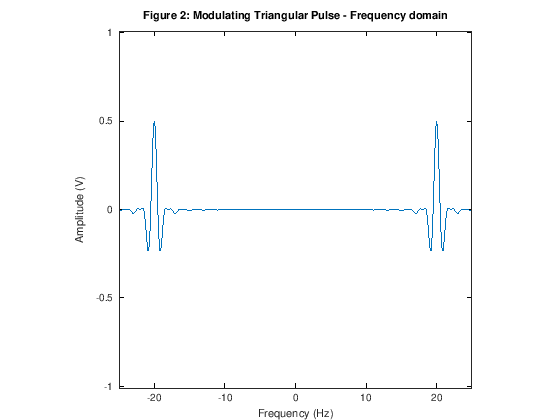

In [6]:
plot(F, V_of_f)
ylabel("Amplitude (V)");
xlabel("Frequency (Hz)");
title("Figure 2: Modulating Triangular Pulse - Frequency domain")
axis('square')
axis([-25 25 -1.01 1.01])



## 
# It can be seen from the graph that the primary components consist of
# frequencies at and around +20 Hz and -20 Hz.

## 
# Note that real value signals
# will have +ve and -ve frequency components.

##
# The same process can be used
# with complex phasors by using |exp(i*2*pi*20*T)| or |exp(-i*2*pi*20*T)| in 
# place of |cos(2*pi*20*T)|. For the +ve phasor the time signal looks the 
# same (Figure 3).

# Create a vector of voltages for those times

In [7]:
V_of_t = 2 * exp(i*2*pi*20*T) .* (0.5 - abs(T));

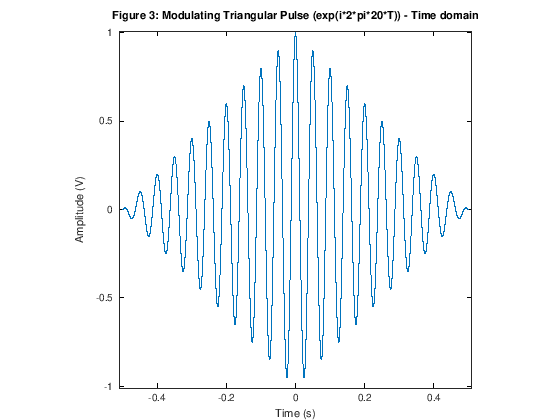

In [8]:
plot(T, V_of_t)
ylabel("Amplitude (V)")
xlabel("Time (s)")
title("Figure 3: Modulating Triangular Pulse (exp(i*2*pi*20*T)) - Time domain")
axis('square')
axis([-0.51 0.51 -1.01 1.01])

In [ ]:
##
# The FFT is calculated again (Figure 4).

In [9]:
V_of_f = fftshift(fft(V_of_t, (size(V_of_t,2)-1)*10+1)/(size(V_of_t,2)/2));

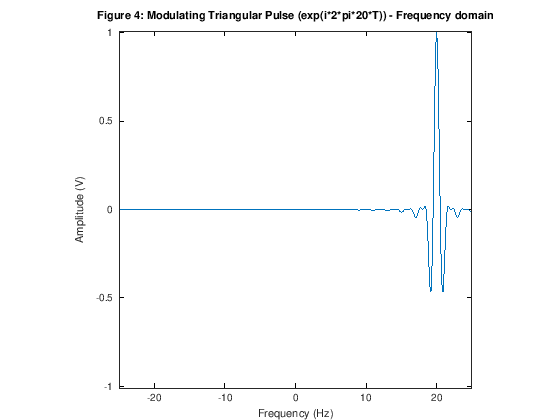

In [10]:
plot(F, V_of_f)
ylabel("Amplitude (V)");
xlabel("Frequency (Hz)");
title("Figure 4: Modulating Triangular Pulse (exp(i*2*pi*20*T)) - Frequency domain")
axis('square')
axis([-25 25 -1.01 1.01])

In [ ]:
## 
# Looking at the FFT there is only one sideband, the USB. Also, the
# component has twice the energy of the previos two, representing conservation
# of energy.

## 
# Now for |exp(-i*2*pi*20*T)| (Figure 5). 

# Create a vector of voltages for those times

In [11]:
V_of_t = 2 * exp(-i*2*pi*20*T) .* (0.5 - abs(T));

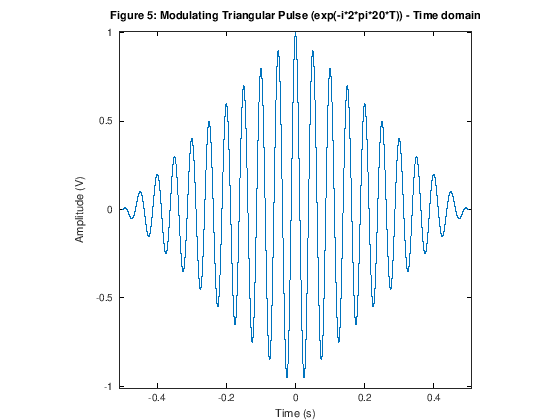

In [12]:
plot(T, V_of_t)
ylabel("Amplitude (V)")
xlabel("Time (s)")
title("Figure 5: Modulating Triangular Pulse (exp(-i*2*pi*20*T)) - Time domain")
axis('square')
axis([-0.51 0.51 -1.01 1.01])

In [13]:
##
# The FFT is calculated (Figure 6).

In [14]:
V_of_f = fftshift(fft(V_of_t, (size(V_of_t,2)-1)*10+1)/(size(V_of_t,2)/2));

In [15]:
F = [-24000: 1/10: 24000];

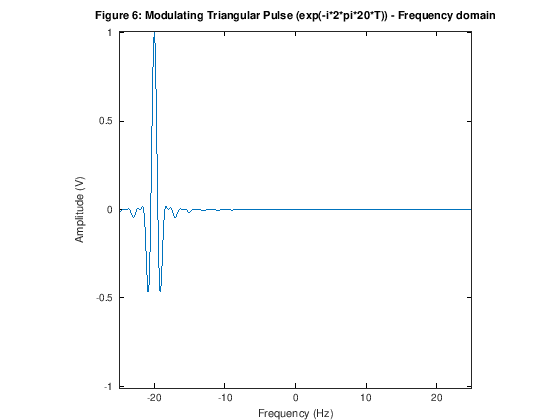

In [16]:
plot(F, V_of_f)
ylabel("Amplitude (V)");
xlabel("Frequency (Hz)");
title("Figure 6: Modulating Triangular Pulse (exp(-i*2*pi*20*T)) - Frequency domain")
axis('square')
axis([-25 25 -1.01 1.01])

In [ ]:
## 
# Looking at the FFT there is only one sideband, the LSB.

In [ ]:
## Strategy for Determining Downlink Frequency of the Uplink Chirp
# To further describe the strategy for determining the downlink frequency
# of the uplink chirp, the SDR will receive the complete satellite downlink
# band and do processing on it. It will look at the _frequency_ representation
# of the chirp that is decided on and determine it frequency offset.
#
# In order to determine the frequency offset, the process will use a 
# <https://en.wikipedia.org/wiki/Matched_filter matched filter>. An example
# of a matched filter will demonstrate the two properties that will make it 
# useful for this process:
#
# * It is easy to determine whether the signal originating the matched filter
# is present,
# * It is easy to determine when the signal originating the matched filter
# has completed.

In [ ]:
#
# For this example a cosine pulse starting at 0 s and ending at 1s

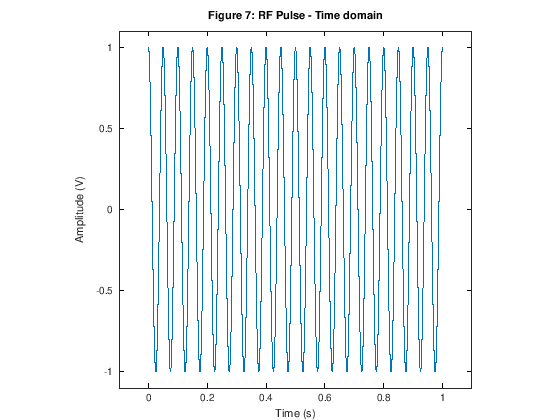

In [17]:
T = [0: 1/48000: 1];
V_of_t = cos(2*pi*20*T);

plot(T, V_of_t)
ylabel("Amplitude (V)")
xlabel("Time (s)")
title("Figure 7: RF Pulse - Time domain")
axis('square')
axis([-0.1 1.1 -1.1 1.1])

In [ ]:
##
# As it turns out the matched filter is the time reversed version of the
# signal, which is the signal itself.
#
# The output of the filter is determined by convolving the input signal
# with the matched filter. For the first part of the example, the input
# is the signal itself followed by 4 sec of silence

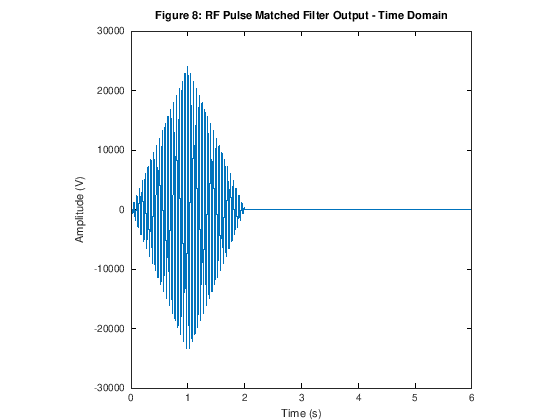

In [18]:
V_input = horzcat(V_of_t, zeros(1, 48000*4));
O_of_t = conv(V_of_t, V_input);
T_of_output = [0: 1/48000: (size(O_of_t,2)-1)/48000];
plot(T_of_output, O_of_t)
ylabel("Amplitude (V)")
xlabel("Time (s)")
title("Figure 8: RF Pulse Matched Filter Output - Time Domain")
axis('square')

In [ ]:
##
# The peak of the envelope determines where RF pulse ends.
#
# For the next part of the example, it will be determined if the signal
# can be detected in the presence of noise. First come up with
# the input signal with the noise at a SNR = -20 (Figure 9).

In [19]:
snr = -20; # dB
# Linearize the SNR
snr_lin = 10^(snr/10);
# Determine the original signal power
e_sig = sum(abs(V_of_t).^2)/size(V_of_t,2);
# And then get noise spectral density
n_0 = e_sig/snr_lin;
n_sigma = sqrt(n_0);

V_noise = n_sigma * randn(1,size(V_input,2));

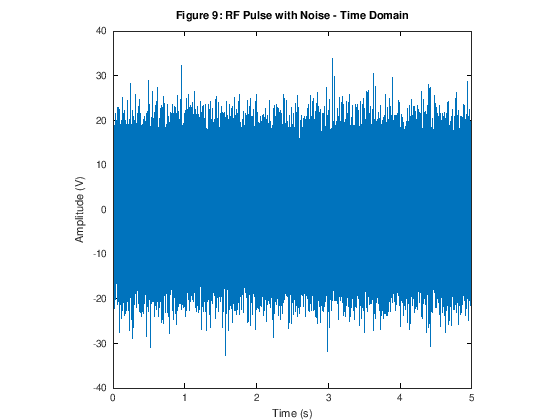

In [20]:
V_signal = V_input .+ V_noise;
plot([0: 1/48000: (size(V_signal,2)-1)/48000], V_signal)
ylabel("Amplitude (V)")
xlabel("Time (s)")
title("Figure 9: RF Pulse with Noise - Time Domain")
axis('square')

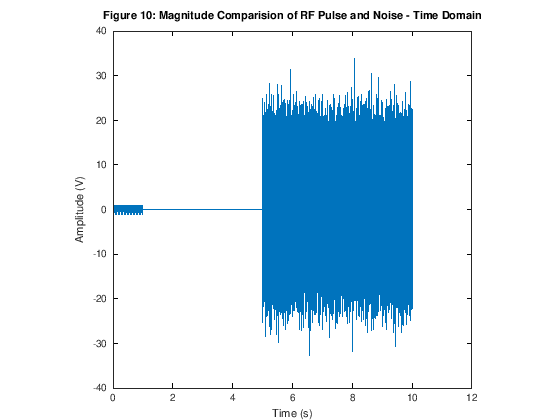

In [21]:
##
# Can you see the pulse amongst the noise? Lets lot them next to each other
# for magnitude comparision (Figure 10).
V_compare = horzcat(V_input, V_noise);
plot([0: 1/48000: (size(V_compare,2)-1)/48000], V_compare)
ylabel("Amplitude (V)")
xlabel("Time (s)")
title("Figure 10: Magnitude Comparision of RF Pulse and Noise - Time Domain")
axis('square')

In [ ]:
##
# Finally lets examine the matched filter output (Fgiure 11).

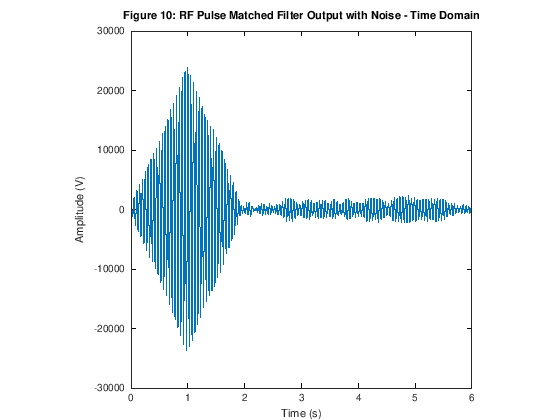

In [22]:
O_of_t = conv(V_of_t, V_signal);
plot(T_of_output, O_of_t)
ylabel("Amplitude (V)")
xlabel("Time (s)")
title("Figure 10: RF Pulse Matched Filter Output with Noise - Time Domain")
axis('square')

In [ ]:
##
# So even though the RF pulse is 20 dB less than the noise, the pulsed filter
# is able to pull it out.

In [ ]:
## 
# So far in the examples a matched filter is shown working in the time domain.
# Matched filters can also be used in the frequency domain. In this case it
# is possible to determine the frequency offset of the signal. The process
# is the following:
#
# * RF pulse -> FFT -> flip in frequency = matched filter
# * input signal -> FFT -> convolve with matched filter = matched filter output
#
# There is a property in time/frequency analysis that can be brought to bear,
# specifically convolution of two signals in one domain is multiplication in
# the other. So now the process becomes:
#
# * RF pulse -> FFT -> flip in frequency -> reverse FFT -> matched filter in time domain
# * input signal -> muly by matched filter in time domain -> FFT = matched filter output

In [ ]:
#
# For the example we are going to use the 20 Hz RF pulse, but just the USB.
# Examine first the matched filter in the time domain (Figure 11).

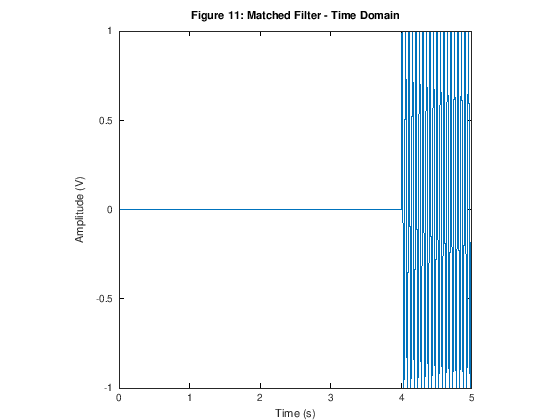

In [23]:
T = [0: 1/48000: 1];
V_of_t = exp(2*i*pi*20*T);
V_input = horzcat(V_of_t, zeros(1, 48000*4));
MatchedFilter_of_t = ifft(flip(fft(V_input)));
plot([0: 1/48000: (size(MatchedFilter_of_t,2)-1)/48000], MatchedFilter_of_t)
ylabel("Amplitude (V)")
xlabel("Time (s)")
title("Figure 11: Matched Filter - Time Domain")
axis('square')

In [ ]:
##
# So now lets use the same pulse, but shift its frequency to 120 Hz and
# add some noise, multiply by the matched filter, then look at a plot of the
# FFT.

In [24]:
V_of_t = exp(2*i*pi*120*T);
V_input = horzcat(V_of_t, zeros(1, 48000*4));


snr = -20; # dB
# Linearize the SNR
snr_lin = 10^(snr/10);
# Determine the original signal power
e_sig = sum(abs(V_of_t).^2)/size(V_of_t,2);
# And then get noise spectral density
n_0 = e_sig/snr_lin;
n_sigma = sqrt(n_0);

V_noise = n_sigma * randn(1,size(V_input,2));
V_signal = V_input .+ V_noise; # Use the same noise from the other example
V_signal_2 = V_signal .* MatchedFilter_of_t;
V_of_f = fft(V_signal_2)/(size(V_signal_2,2)/2);

In [ ]:
F = [0: 1/5: (size(V_signal_2)-1)/5]; # 5 comes from legth of sample in time
plot(F, V_of_f)
ylabel("Amplitude (V)");
xlabel("Frequency (Hz)");
title("Figure 6: Modulating Triangular Pulse (exp(-i*2*pi*20*T)) - Frequency domain")
axis('square')